In [2]:
#import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

import warnings
warnings.filterwarnings('ignore')

# Part One

In [3]:
df = pd.read_csv('employee_attrition.csv') #import the dataset

In [4]:
df.head() # checking the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.nunique().nsmallest(10) #checking the unique values

EmployeeCount        1
Gender               1
Over18               1
StandardHours        1
Attrition            2
OverTime             2
PerformanceRating    2
BusinessTravel       3
Department           3
MaritalStatus        3
dtype: int64

In [5]:
df[df.duplicated()] 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [5]:
df.info() #despite the gender column the rest looks good
# df.describe() # we can use describe here aswell to check the count for more statistical view

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      588 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

In [7]:
df.isna().sum() #as we can see the Gender column is missing some values

In [6]:
df['Gender'].count() #588 is 40% of the employees 

588

In [7]:
plt # since we have only Female in the dataset i would assume the missing values are Male.

array(['Female', nan], dtype=object)

In [8]:
df['Gender'] = df['Gender'].fillna('Male')

In [9]:
df['Gender'].count() #now we have 1470 values which means no more missing values

1470

In [10]:
# Ensure all columns match the data types listed in the data dictionary.
print(type('YearsAtCompany')) #is an object but according to dictionary should be an intinger

<class 'str'>


In [11]:
df['YearsAtCompany'].unique() #we can notice here the value '5!' needs to be converted

array(['6', '10', '0', '8', '2', '7', '1', '9', '5', '4', '25', '3', '12',
       '14', '22', '5!', '15', '27', '21', '17', '11', '13', '37', '16',
       '20', '40', '24', '33', '19', '36', '18', '29', '31', '32', '34',
       '26', '30', '23'], dtype=object)

In [12]:
df['YearsAtCompany'] = df['YearsAtCompany'].replace(['5!'],'5') #replacing the value

In [13]:
df['YearsAtCompany'] = df['YearsAtCompany'].astype(float).astype(int)

In [14]:
# Taking a general look on the unique values of every column and the format looks ok, no other modification needed
#for col in df:
    #print(df[col].unique())

In [15]:
# On the dictionary provided EmployeeNumber is not present so i decide to remove it 

df.drop(['EmployeeNumber'],axis=1,inplace=True)
#df.columns

In [18]:
# checking how many unique values we have and in column [9,22,27] is only one so for our visualisation task is useless

#for col in df:
    #print(df[col].nunique())

In [16]:
#droping the columns because they have zero variance

df.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis = 'columns', inplace = True)

In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
df.shape #we are left with 31 columns and zero missing values ready for some visualisation

(1470, 31)

# PART 2

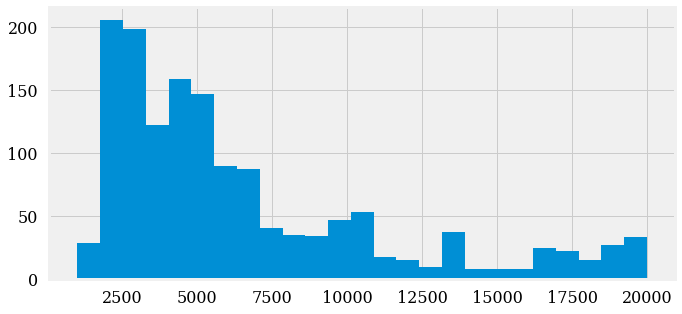

In [18]:
# Simple barplot to check the Monthly Income

plt.figure(figsize = (10,5))
df['MonthlyIncome'].hist(bins = 25)

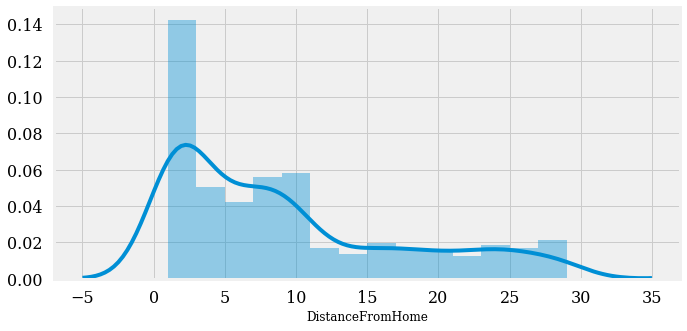

In [19]:
# Simple barplot to check the Distance From Home with KDE

plt.figure(figsize = (10,5))
sns.distplot(df['DistanceFromHome'], kde = True)

In [20]:
# Correlation between the numerical variables to check the relationship

corrmat = df.corr()
corrmat.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


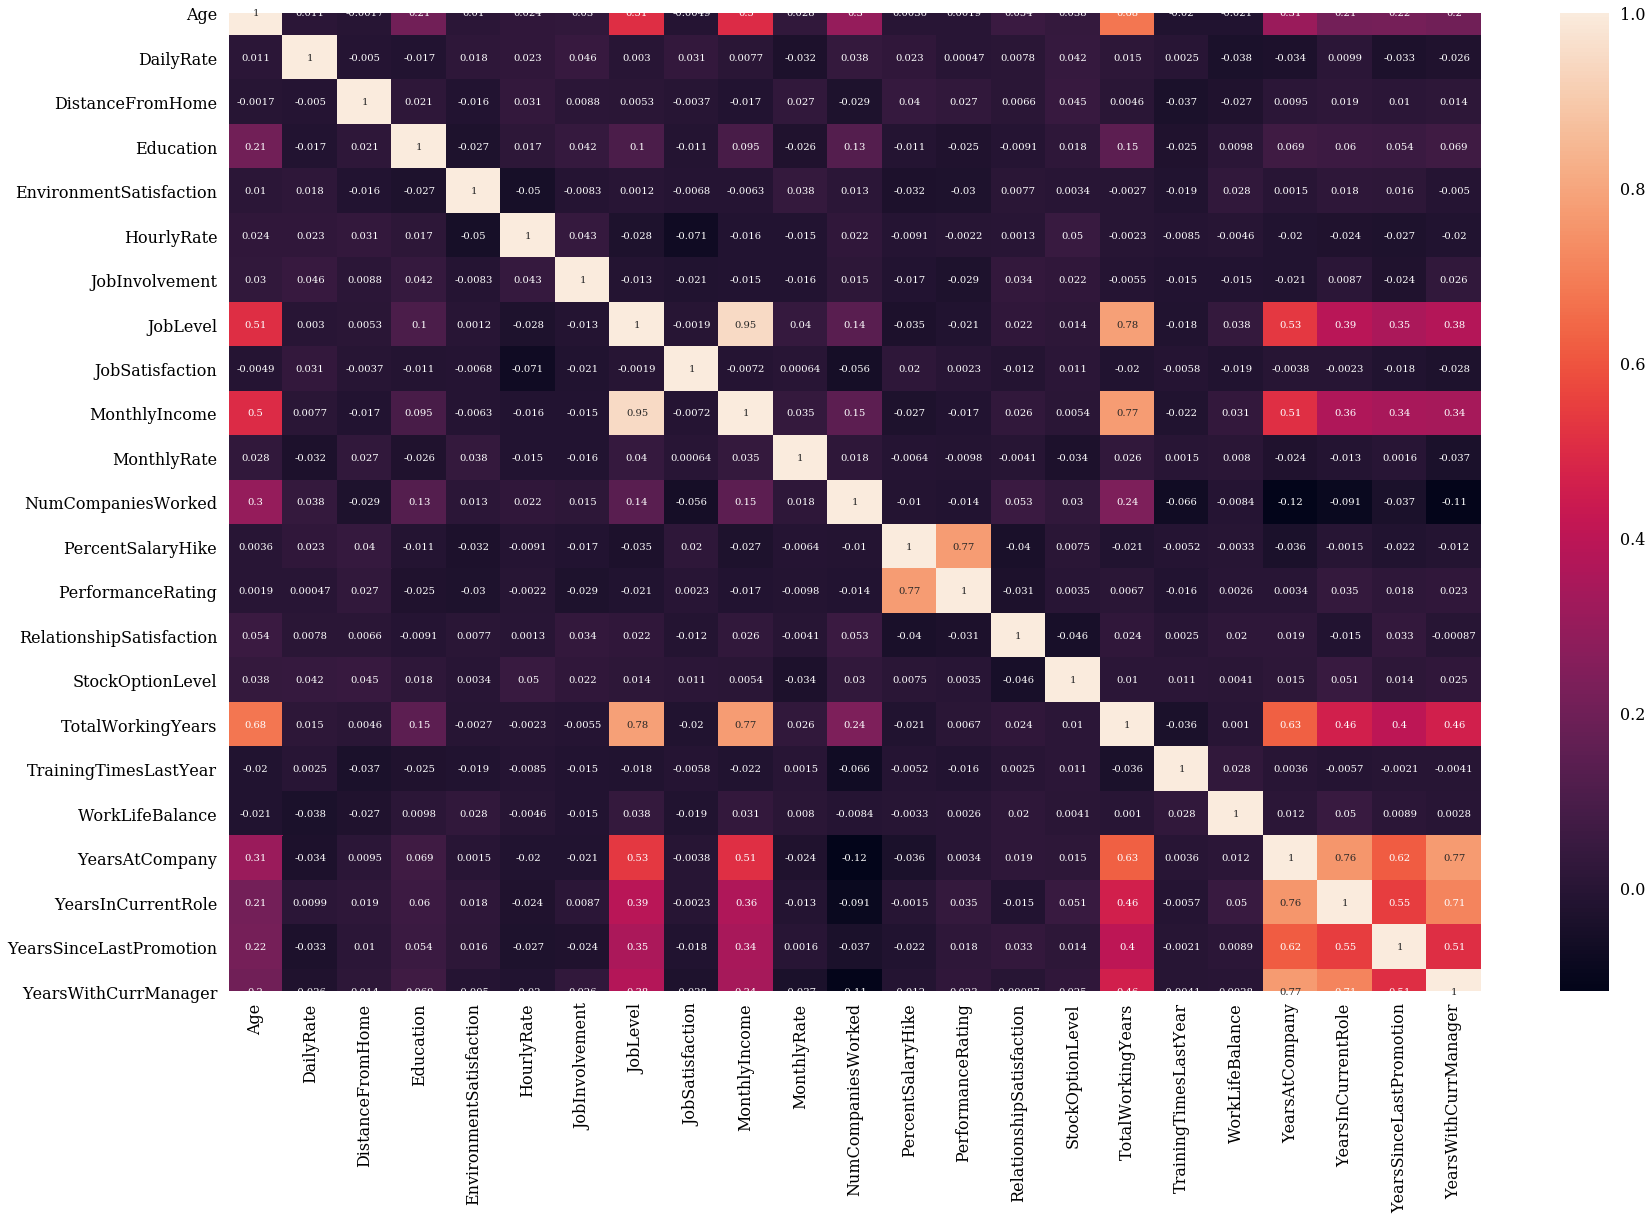

In [21]:
# Built the heatmap with seaborn

plt.figure(figsize=(25,18))
sns.heatmap(df.corr(),annot=True)

# MonthlyIncome and JobLevel are highly correlated
# TotalWorkingYears and JobLevel are highly correlated
# TotalWorkingYears and MonthlyIncome are highly correlated
# PercentSalaryHike and PerformanceRating are highly correlated
# YearsInCurrentRole and YearsAtCompany are highly correlated
# YearsWithCurrManager and YearsAtCompany are highly correlated


# In a statistical analysis we would need to remove this variables to avoid 
# any prediction mistake by the model

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

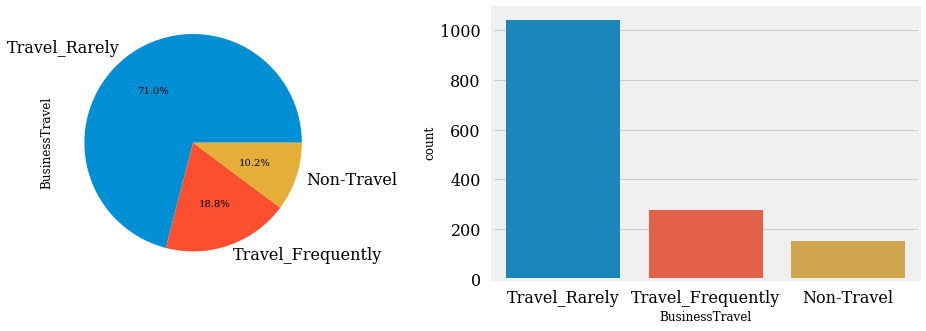

In [26]:
# How much the employee travels for work (no travel, travels frequently, or travels rarely)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['BusinessTravel'])
df['BusinessTravel'].value_counts()

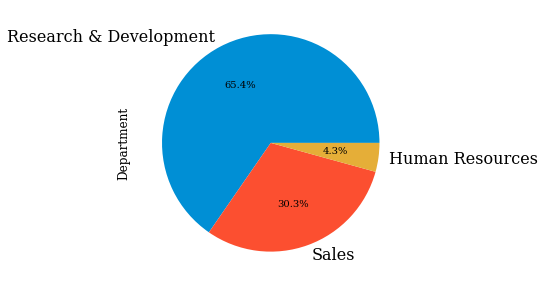

In [22]:
# Department (HR, R&D, or Sales)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Department'].value_counts().plot.pie(autopct='%1.1f%%')

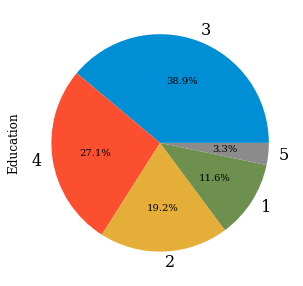

In [23]:
# Education
# Education level: 1 = 'Below College'; 2 = 'College'; 3 = 'Bachelor'; 4 = 'Master'; 5 = 'Doctor'

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')

# Only 3.3% employee hold the highest education qualification. 
# Most of the employees have the education 'Bachelor'

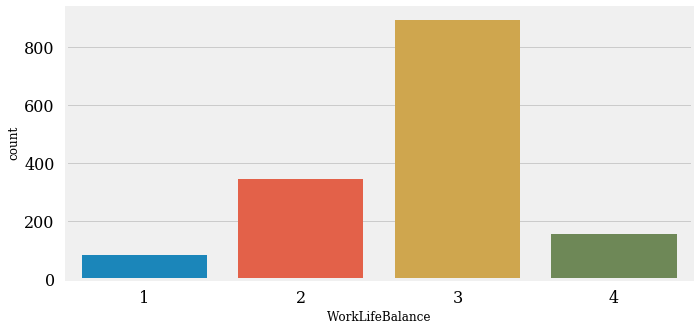

In [24]:
# Work-life balance: 1 = 'Bad'; 2 = 'Good'; 3 = 'Better;' 4 = 'Best' 

plt.figure(figsize=(10,5))
sns.countplot(df['WorkLifeBalance'])

# Majority of the employees have there life balance at level 3, 
# there are around 5.4% employees who need to work on this. 
# Only 10.4% employees have there life completely balanced.

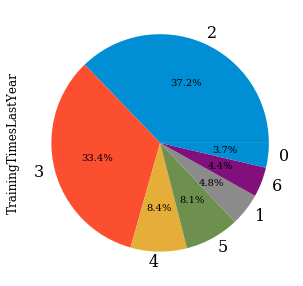

In [30]:
# Hours spent in training last year

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['TrainingTimesLastYear'].value_counts().plot.pie(autopct='%1.1f%%')


# Most of the employees train 2 to 3 times a year while no. of employees 
# training rigorously or doing none of the training are very few in numbers.

In [25]:
# Choosing some of the most popular variables of this dataset 

multi_var = ['Age','DistanceFromHome', 'Gender','NumCompaniesWorked',
              'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'Department',]

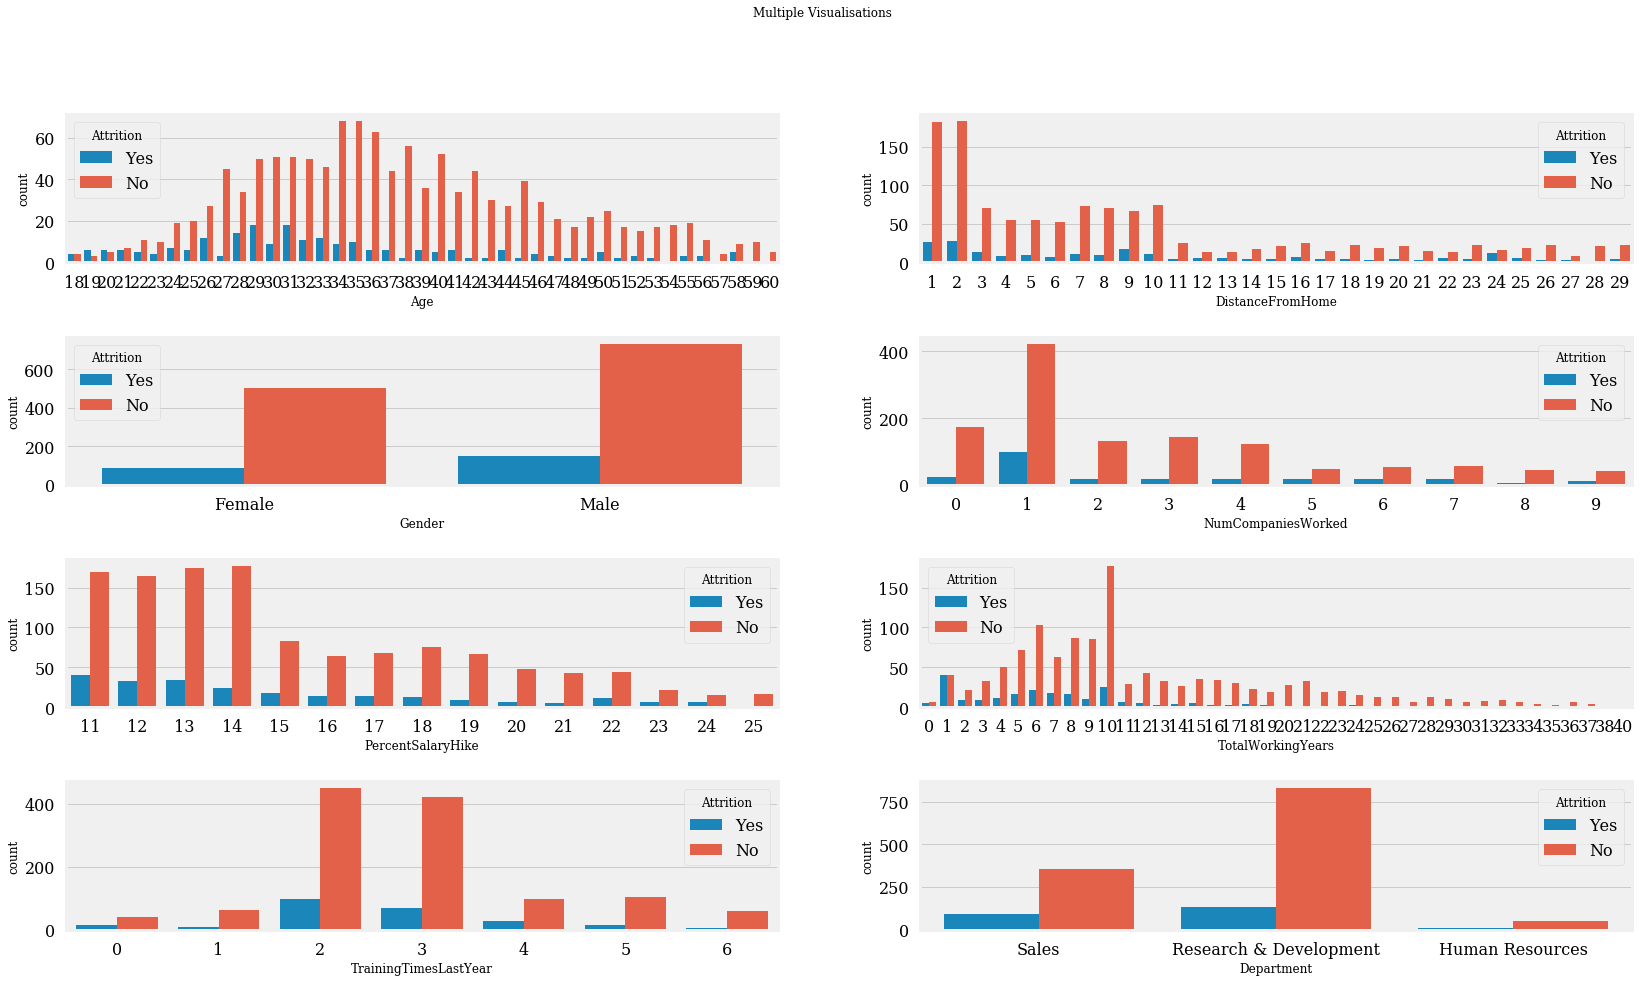

In [26]:
# Making a Multiple Visualisation grid to have a wider insight on different observations

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Multiple Visualisations')

for feat, ax in zip(multi_var, axes.flatten()):
    sns.countplot(data=df, x=feat, hue='Attrition', ax=ax)

## PART 3

In [27]:
# For this part i have decided to focus on some paterns noticed during the previous 2 steps of this
# analysis like Age of Employees 

Text(35, 65, 'Average age is 37 years')

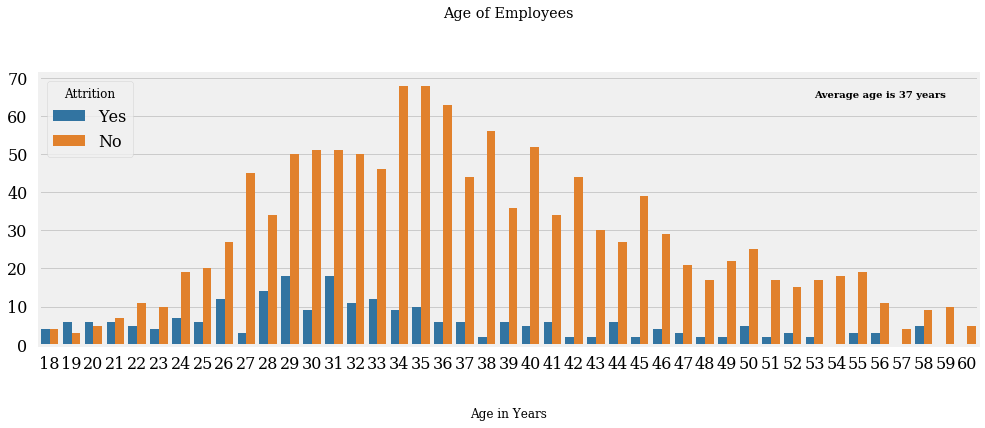

In [36]:
# Relationship between Age and Attrition
# Younger people tend to quit more than older people

plt.figure(figsize = (15,5))
ax = sns.countplot(data = df,
            x = "Age",
            hue = "Attrition",
            palette = "tab10")

ax.set_title("Age of Employees", pad = 55)
ax.set_ylabel(None)
ax.set_xlabel("Age in Years", labelpad = 35)

plt.text(x = 35, y = 65, s =  "Average age is 37 years", fontweight = 'semibold')

In [43]:
# Decided to built a function for the KDE,visualizing the distribution of observations in a dataset,analagous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.

def plot_kde(feature, figsize=None):
    
    fig = plt.figure(figsize=(20,5))


    sns.kdeplot(df[df['Attrition']=='No'][feature])
    sns.kdeplot(df[df['Attrition']=='Yes'][feature])

    fig.legend(labels=['Attrition No', 'Attrition Yes'])
    plt.title('Based on %s'%feature, size = 40, color = 'red')
    plt.xlabel(feature, size = 35, color = 'black')
    plt.show()

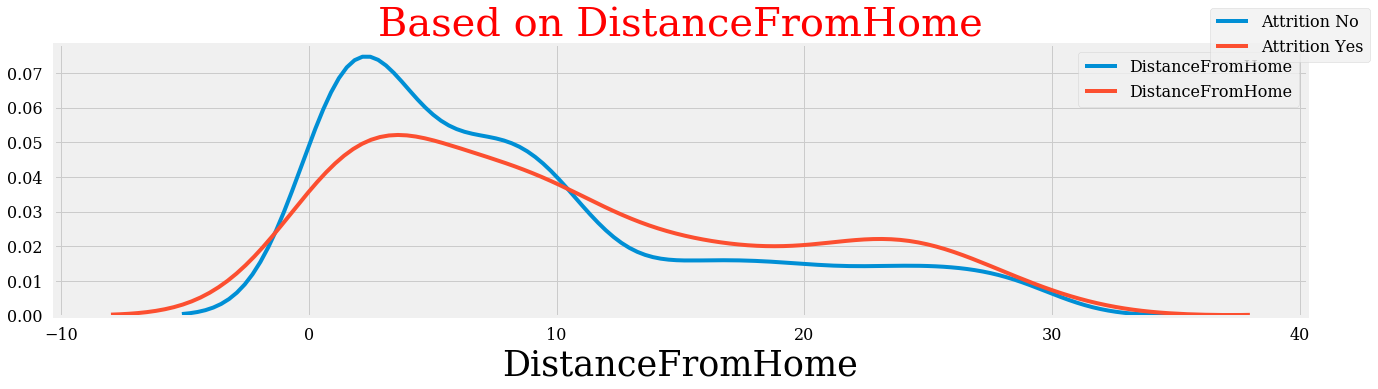

In [44]:
# Relationship Between Distance From Home and Attrition

# Is there a relationship between employee attrition and the distance they live from work?
# We can notice that bigger is the distance higher is number of Attrition

for feature in ['DistanceFromHome']:
    plot_kde(feature)

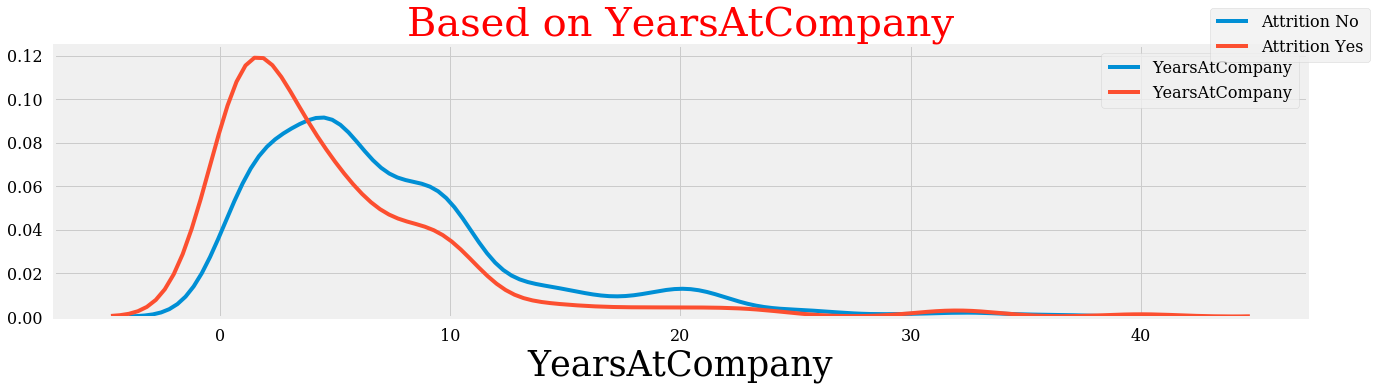

In [45]:
# Relationship of number of years working for the company and Attrition
# We can notice that who quits is more likely someone who hasn't spend much time in the company

for feature in ['YearsAtCompany']:
    plot_kde(feature)

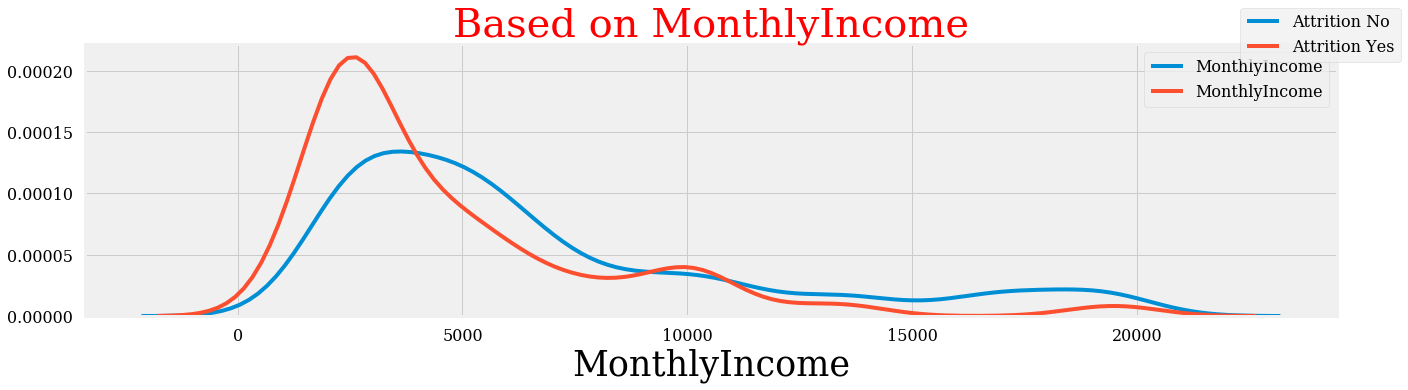

In [46]:
# Is there a trend between income and attrition?

# We can notice a trend where lower is the income higher is the attrition level
# and it makes sense where people with lower salary are looking for something better

for feature in ['MonthlyIncome']:
    plot_kde(feature)

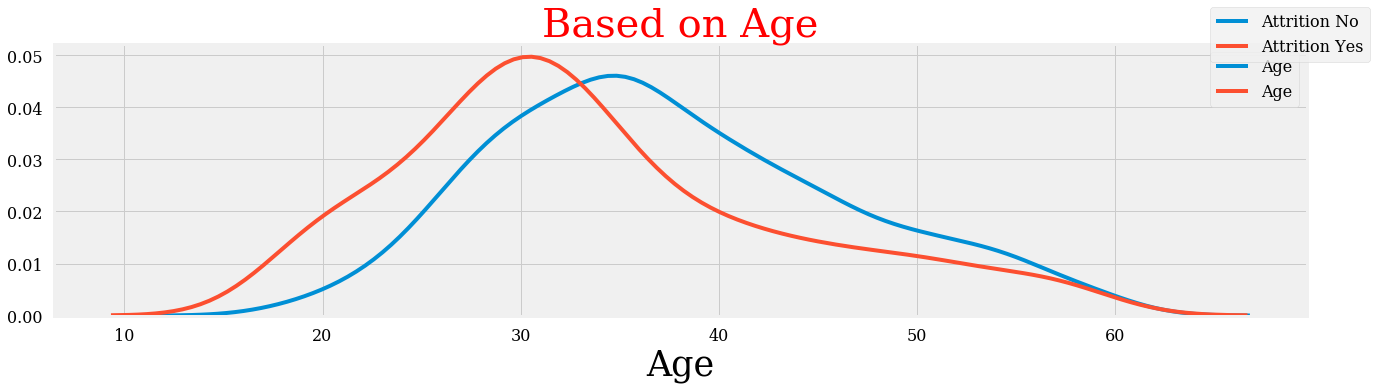

In [47]:
# What types of employees are at higher risk of attrition?

# Younger employers are at higher risk of attrition as we can see in this kde plot

for feature in ["Age"]:
    plot_kde(feature)

<Figure size 720x360 with 0 Axes>

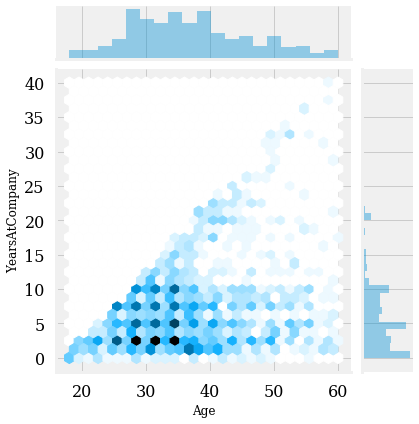

In [48]:
# This is a jointplot between Age and Years at Company

plt.figure(figsize = (10,5))
sns.jointplot(x = "Age", y = "YearsAtCompany", data = df, kind='hex')

Text(0.5, 1.0, 'Monthly Income by Gender')

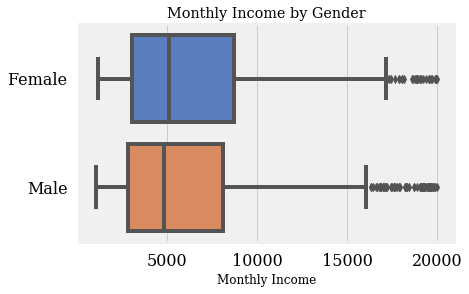

In [50]:
# Gender comparison for monthly income

# Male Employees are doing better in this range and with higher number of outliers 
# which means in the managerial roles has higher chances to be a male than a female

ax = sns.boxplot(data = df,
           y = "Gender",
           x = "MonthlyIncome",
           palette = "muted")

ax.set_xlabel("Monthly Income")
ax.set_ylabel(None)
ax.set_title("Monthly Income by Gender")